# Семинар 1. Обработка данных, визуализация и тривиальные модели.

## Обработка временных данных

Временные зависимости не сулят нам ничего хорошего при построении моделей. Аналогичная ситуация происходит и при обработке данных. Будем честны, далеко не во всех компаниях хранение данных реализовано хорошо и аккуратно. И временные ряды к таким неаккуратностям наиболее чувствительны. 

Начнём для начала с базовых библиотек python, которые могут нам пригодиться. Обычно они необходимы на этапе, когда мы читаем данные из каких-либо нестандартных источников или нам необходимо вручную до выгрузки в пандас точечно скорректировать некоторые даты.

### datetime

In [ ]:
from datetime import datetime

datetime.now()

datetime.datetime(2025, 1, 11, 12, 48, 28, 657620)

In [ ]:
a=datetime.now()

print(a.year)
print(a.day)
print(a.month)
print(a.hour)
print(a.minute)
print(a.second)
print(a.microsecond)
print(a.date)

2025
11
1
16
29
0
73904
<built-in method date of datetime.datetime object at 0x128574180>


In [106]:
a.date()

datetime.date(2025, 1, 11)

In [ ]:
from datetime import timezone


a=datetime.now(tz=timezone.utc)
a

datetime.datetime(2025, 1, 11, 13, 29, 38, 12721, tzinfo=datetime.timezone.utc)

In [ ]:

# importing time delta module
from datetime import timedelta

# subtracting date from year 2027 to 2021
deltaresult = datetime(2027, 5, 7) - datetime(2021, 6, 24)

# display the result
print(deltaresult)

# to get days
print(deltaresult.days)

# to get seconds difference
print(deltaresult.seconds)

2143 days, 0:00:00
2143
0


Хранятся внутри только дни, секунды и микросекунды. Остальные аргументы неявно конвертируются в них.

In [109]:
from datetime import timedelta
delta = timedelta(
    days=50,
    seconds=27,
    microseconds=10,
    milliseconds=29000,
    minutes=5,
    hours=8,
    weeks=2
)

delta

datetime.timedelta(days=64, seconds=29156, microseconds=10)

* 0 <= microseconds < 1000000

* 0 <= seconds < 3600*24 (кол-во секунд в дне)

* -999999999 <= days <= 999999999

Обратите внимание, нормализация иногда может давать неожиданный результат из-за ограничений на значения атрибутов.

In [110]:
from datetime import timedelta
d = timedelta(microseconds=-1)
(d.days, d.seconds, d.microseconds)

(-1, 86399, 999999)

In [8]:
import pandas as pd


Дальнейший разговор потребует упоминания таких важных характеристик как частота и периодичность.

### Периодичность временных рядов

 Мы подошли к первой важной характеристике временного ряда — **периодичности**. Временной ряд — это последовательность значений, собранных в определённые моменты времени. Однако поставщик данных не всегда гарантирует, что значения собираются через равные промежутки времени (например, день, месяц, год). 

Таким образом, данные можно разделить на два типа:
1. **Периодические** — данные, которые повторяются через регулярные промежутки времени.
2. **Непериодические** (или **спорадические**) — данные, которые не следуют чёткой периодичности.

> ⚠️ В рамках нашего курса мы будем рассматривать только периодические временные ряды, исключая спорадические.



### Частота временных данных

Временные данные характеризуются **частотностью** (*frequency*). Частота определяет количество периодов между эквивалентными по календарным правилам точками и выражается численно. Например:
- Для **годовых** данных частота равна **1** (один период — год).
- Для **месячных** данных частота равна **12** (12 месяцев в году).
- Для **дневных** данных может присутствовать несколько частот:
  - **365.366**, если считать среднее количество дней в году;
  - **30/31**, если учитывать месяцы;
  - **7**, если рассматривать недели.





Pandas включает 4 общие концепции, связанные со временем:

1. **Дата и время**: Определённая дата и время с поддержкой часовых поясов. Аналогично `datetime.datetime` из стандартной библиотеки.

2. **Дельта**: Абсолютная временная продолжительность. Аналогично `datetime.timedelta` из стандартной библиотеки.

3. **Период**: Промежуток времени, определяемый точкой времени и связанной с ней частотой.

4. **Оффсет**: Относительная временная продолжительность с учётом календарной арифметики. Аналогично `dateutil.relativedelta.relativedelta` из пакета `dateutil`.

| Концепция           | Скалярный класс | Класс массива       | Тип данных pandas          | Основной метод создания         |
|---------------------|-----------------|---------------------|----------------------------|----------------------------------|
| **Дата и время**    | `Timestamp`     | `DatetimeIndex`     | `datetime64[ns]` или   `datetime64[ns, tz]`     | `to_datetime` или `date_range`  |
| **Дельта** | `Timedelta`   | `TimedeltaIndex`    | `timedelta64[ns]`          | `to_timedelta` или `timedelta_range` |
| **Период** | `Period`     | `PeriodIndex`       | `period[freq]`             | `Period` или `period_range`     |
| **Оффсет** | `DateOffset` | `None`              | `None`                     | `DateOffset`                    |


Первые три типа можно использовать в качестве индекса

In [9]:
pd.Series(range(3), index=pd.date_range("2000", freq="D", periods=3))

2000-01-01    0
2000-01-02    1
2000-01-03    2
Freq: D, dtype: int64

In [10]:
pd.Series(range(3), index=pd.date_range("1/1/2011", freq="ME", periods=3))

2011-01-31    0
2011-02-28    1
2011-03-31    2
Freq: ME, dtype: int64

In [11]:
pd.Series(range(5), index=pd.timedelta_range(start='1 day', end='5 days', periods=5))

1 days    0
2 days    1
3 days    2
4 days    3
5 days    4
dtype: int64

Или в качестве непосредственно данных

In [111]:
pd.Series(pd.date_range("2000", freq="D", periods=3))

0   2000-01-01
1   2000-01-02
2   2000-01-03
dtype: datetime64[ns]

In [112]:
pd.Series(pd.period_range("1/1/2011", freq="M", periods=3))

0    2011-01
1    2011-02
2    2011-03
dtype: period[M]

In [113]:
pd.Series(pd.timedelta_range(start='1 day', end='5 days', periods=5))

0   1 days
1   2 days
2   3 days
3   4 days
4   5 days
dtype: timedelta64[ns]

In [114]:
pd.Series([pd.DateOffset(1), pd.DateOffset(2)])

0         <DateOffset>
1    <2 * DateOffsets>
dtype: object

Также есть специальные форматы для пропущенных данных

In [115]:
pd.Timestamp(pd.NaT)


NaT

In [116]:
pd.Timedelta(pd.NaT)


NaT

In [117]:
pd.Period(pd.NaT)


NaT

In [118]:
pd.NaT == pd.NaT


False

Timestamp можно сконвертировать в Period, но не для всех оффсетов

In [120]:
pd.Timestamp("01.01.2002").to_period("M")


Period('2002-01', 'M')

In [85]:
pd.Timestamp("01.01.2002").to_period("MS")

ValueError: MS is not supported as period frequency

In [79]:
pd.period_range("1/1/2011", freq="M", periods=3).to_timestamp()

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01'], dtype='datetime64[ns]', freq='MS')

In [84]:
pd.period_range("1/1/2011", freq="MS", periods=3).to_timestamp()

ValueError: MS is not supported as period frequency

In [121]:
pd.date_range("1/1/2011", freq=pd.offsets.MonthEnd(), periods=3)

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31'], dtype='datetime64[ns]', freq='ME')

## DateOffset

Для того, чтобы указывать частоту мы использовали строки специального вида. Например, "D". Они используются для генерации последовательностей Timestamp или Period, а также для спецификации самих интервалов Period.

Существует специальный объект DateOffset, который выполняет схожую функцию. Ниже можно найти таблицу сопоставления строковых частот и DateOffset. Актуальная версия доступна также в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

<details>
<summary>Список частот и оффсетов (DateOffset) </summary>

| **DateOffset**                       | **Frequency String** | **Description**                                    |
|--------------------------------------|----------------------|----------------------------------------------------|
| **None**                             | -                    | Generic offset class, defaults to absolute 24 hours |
| **BDay** или **BusinessDay**         | `B`                  | business day (weekday)                            |
| **CDay** или **CustomBusinessDay**   | `C`                  | custom business day                                |
| **Week**                             | `W`                  | one week, optionally anchored on a day of the week |
| **WeekOfMonth**                      | `WOM`                | the x-th day of the y-th week of each month        |
| **LastWeekOfMonth**                  | `LWOM`               | the x-th day of the last week of each month        |
| **MonthEnd**                         | `ME`                 | calendar month end                                 |
| **MonthBegin**                       | `MS`                 | calendar month begin                               |
| **BMonthEnd** или **BusinessMonthEnd**             | `BME`                | business month end                                 |
| **BMonthBegin** или **BusinessMonthBegin**         | `BMS`                | business month begin                               |
| **CBMonthEnd** или **CustomBusinessMonthEnd**      | `CBME`               | custom business month end                          |
| **CBMonthBegin** или **CustomBusinessMonthBegin**  | `CBMS`               | custom business month begin                        |
| **SemiMonthEnd**                     | `SME`                | 15th (or other day_of_month) and calendar month end |
| **SemiMonthBegin**                   | `SMS`                | 15th (or other day_of_month) and calendar month begin |
| **QuarterEnd**                       | `QE`                 | calendar quarter end                               |
| **QuarterBegin**                     | `QS`                 | calendar quarter begin                             |
| **BQuarterEnd**                      | `BQE`                | business quarter end                               |
| **BQuarterBegin**                    | `BQS`                | business quarter begin                             |
| **FY5253Quarter**                    | `REQ`                | retail (aka 52-53 week) quarter                    |
| **YearEnd**                          | `YE`                 | calendar year end                                  |
| **YearBegin**                        | `YS` или `BYS`       | calendar year begin                                |
| **BYearEnd**                         | `BYE`                | business year end                                  |
| **BYearBegin**                       | `BYS`                | business year begin                                |
| **FY5253**                           | `RE`                 | retail (aka 52-53 week) year                       |
| **Easter**                           | -                    | Easter holiday                                     |
| **BusinessHour**                     | `bh`                 | business hour                                      |
| **CustomBusinessHour**               | `cbh`                | custom business hour                               |
| **Day**                              | `D`                  | one absolute day                                   |
| **Hour**                             | `h`                  | one hour                                          |
| **Minute**                           | `min`                | one minute                                        |
| **Second**                           | `s`                  | one second                                        |
| **Milli**                            | `ms`                 | one millisecond                                   |
| **Micro**                            | `us`                 | one microsecond                                   |
| **Nano**                             | `ns`                 | one nanosecond                                    |

</details>


Важно отметить, что DateOffset похож на Timedelta. Для всех коротких интервалов (Hour, Minute, Second, Milli, Micro, Nano) они ведут себя одинаково. Однако для всех остальных может проявляться разница вследствие смены часовых поясов.

In [86]:
import pandas as pd

# Пример даты с переходом на зимнее время (Helsinki)
ts = pd.Timestamp("2016-10-30 00:00:00", tz="Europe/Helsinki")

print("Исходная дата:", ts)

# Прибавляем Timedelta (учитывает абсолютное время)
abs_time_result = ts + pd.Timedelta(days=1)
print("Смещение Timedelta (days=1) с учётом абсолютного времени:", abs_time_result)

# Прибавляем DateOffset (учитывает календарное время)
cal_time_result = ts + pd.DateOffset(days=1)
print("Смещение DateOffset (days=1) с учётом календарного времени:", cal_time_result)



Исходная дата: 2016-10-30 00:00:00+03:00
Смещение Timedelta (days=1) с учётом абсолютного времени: 2016-10-30 23:00:00+02:00
Смещение DateOffset (days=1) с учётом календарного времени: 2016-10-31 00:00:00+02:00


In [87]:
import pandas as pd

# Пример даты с переходом на зимнее время (Helsinki)
ts = pd.Timestamp("2016-10-30 00:00:00", tz="Europe/Helsinki")

print("Исходная дата:", ts)

# Прибавляем Timedelta (учитывает абсолютное время)
abs_time_result = ts + pd.Timedelta(hours=24)
print("Смещение Timedelta (days=1) с учётом абсолютного времени:", abs_time_result)

# Прибавляем DateOffset (учитывает календарное время)
cal_time_result = ts + pd.DateOffset(hours=24)
print("Смещение DateOffset (days=1) с учётом календарного времени:", cal_time_result)




Исходная дата: 2016-10-30 00:00:00+03:00
Смещение Timedelta (days=1) с учётом абсолютного времени: 2016-10-30 23:00:00+02:00
Смещение DateOffset (days=1) с учётом календарного времени: 2016-10-30 23:00:00+02:00


In [88]:
# Пример добавления бизнес-дней (BusinessDays)
friday = pd.Timestamp("2018-01-05")
print("\nИсходная дата (пятница):", friday, friday.day_name())

two_business_days = 2 * pd.offsets.BDay()
res_business = friday + two_business_days
print("После прибавления двух рабочих дней:", res_business, res_business.day_name())


Исходная дата (пятница): 2018-01-05 00:00:00 Friday
После прибавления двух рабочих дней: 2018-01-09 00:00:00 Tuesday


## Пример данных
Попробуем прочитать пример данных с помощью pandas. Данные бывают двух видов.: те, которые изначально собирались и хранились как временные ряды, и транзакционные данные, которые необходимо пердварительно агрегировать и преобразовать, чтобы получились временные ряды. Рассмотрим сразу второй случай, он содержательнее.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)


In [ ]:
# Читаем данные
data = pd.read_csv("data/sem_1/t")
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [125]:
# Выберем индивида с самой длинной историей
data.groupby(by=['customer_id']).count()['tran_amount'].idxmax()

'CS4424'

В первую очередь необходимо привести индекс к правильному формату для того, чтобы было возможно эффективно оперировать с датами.

In [127]:
sample = data.groupby(by=['customer_id', 'trans_date']).sum().loc['CS4424']
sample

,tran_amount
trans_date,
01-Dec-11,47
01-Nov-12,99
04-Jul-12,36
04-Jul-13,57
04-Oct-12,97
04-Oct-14,96
08-May-13,81
10-Feb-14,54
10-Mar-13,176


In [128]:
# Изначально индекс -- в формате строк
sample.index

Index(['01-Dec-11', '01-Nov-12', '04-Jul-12', '04-Jul-13', '04-Oct-12',
       '04-Oct-14', '08-May-13', '10-Feb-14', '10-Mar-13', '10-Sep-11',
       '11-Apr-13', '11-Mar-13', '11-May-14', '13-Feb-13', '13-Mar-14',
       '15-Dec-14', '16-Mar-14', '16-May-13', '17-Apr-13', '17-Apr-14',
       '19-Aug-11', '19-Jan-15', '20-Nov-11', '24-Dec-14', '25-Aug-11',
       '25-Dec-13', '25-May-11', '26-Feb-14', '26-Mar-14', '27-Apr-13',
       '27-Jul-13', '28-Dec-12', '28-Dec-14', '28-Oct-14', '29-Apr-14',
       '29-Jan-12', '29-Nov-11', '30-Apr-13'],
      dtype='object', name='trans_date')

In [129]:
sample

,tran_amount
trans_date,
01-Dec-11,47
01-Nov-12,99
04-Jul-12,36
04-Jul-13,57
04-Oct-12,97
04-Oct-14,96
08-May-13,81
10-Feb-14,54
10-Mar-13,176


Переведём индекс в формат datetime. Это специальный формат, характеризующий точку во времени

In [130]:
# Переведём в формат datetime
sample.index = pd.to_datetime(sample.index)
sample.index

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_24544/1960411644.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample.index = pd.to_datetime(sample.index)


DatetimeIndex(['2011-12-01', '2012-11-01', '2012-07-04', '2013-07-04',
               '2012-10-04', '2014-10-04', '2013-05-08', '2014-02-10',
               '2013-03-10', '2011-09-10', '2013-04-11', '2013-03-11',
               '2014-05-11', '2013-02-13', '2014-03-13', '2014-12-15',
               '2014-03-16', '2013-05-16', '2013-04-17', '2014-04-17',
               '2011-08-19', '2015-01-19', '2011-11-20', '2014-12-24',
               '2011-08-25', '2013-12-25', '2011-05-25', '2014-02-26',
               '2014-03-26', '2013-04-27', '2013-07-27', '2012-12-28',
               '2014-12-28', '2014-10-28', '2014-04-29', '2012-01-29',
               '2011-11-29', '2013-04-30'],
              dtype='datetime64[ns]', name='trans_date', freq=None)

In [131]:
sample.index[0]

Timestamp('2011-12-01 00:00:00')

Чаще всего to_datetime сам справляется с парсингом дат, но иногда он это делает неверно. Если вручную специфицировать формат, то ошибок точно не будет.


In [132]:
pd.to_datetime("12-11-2010 10:00", format="%d-%m-%Y %H:%M")

Timestamp('2010-11-12 10:00:00')

Внимание! При парсинге числовой записи без формата по дефолту используется американская запись даты: месяц - день - год

In [133]:
pd.to_datetime("12-11-2010 10:00").day

11

Чтобы этого избежать используюте dayfirst = True. А лучше всегда пишите формат на всякий случай, "явное лучше неявного".

In [134]:
pd.to_datetime("12-11-2010 10:00", dayfirst=True).day

12

При более явных форматах такого, конечно, не происходит

In [135]:
pd.to_datetime('24-Dec-14').day

24

Также часто бывают ситуации, когда отдельные компоненты даты разнесены в разные столбцы. Это также не проблема. Если подать в to_datetime датафрейм со специальными именами столбцов, то он преобразует его в единый pd.Series.

Обязательные столбцы: year, month, day
Опциональные столбцы: hour, minute, second, millisecond, microsecond, nanosecond

In [ ]:
df = pd.DataFrame(
    {
        "year": [2015, 2016],
        "month": [2, 3],
        "day": [4, 5],
        "hour": [2, 3]
          }
)
df

,year,month,day,hour
0,2015,2,4,2
1,2016,3,5,3


In [142]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

None конвертируется в NaT

In [143]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

In [149]:
sample = sample.sort_index()
sample

,tran_amount
trans_date,
2011-05-25,80
2011-08-19,102
2011-08-25,58
2011-09-10,68
2011-11-20,89
2011-11-29,103
2011-12-01,47
2012-01-29,86
2012-07-04,36


<Axes: xlabel='trans_date'>

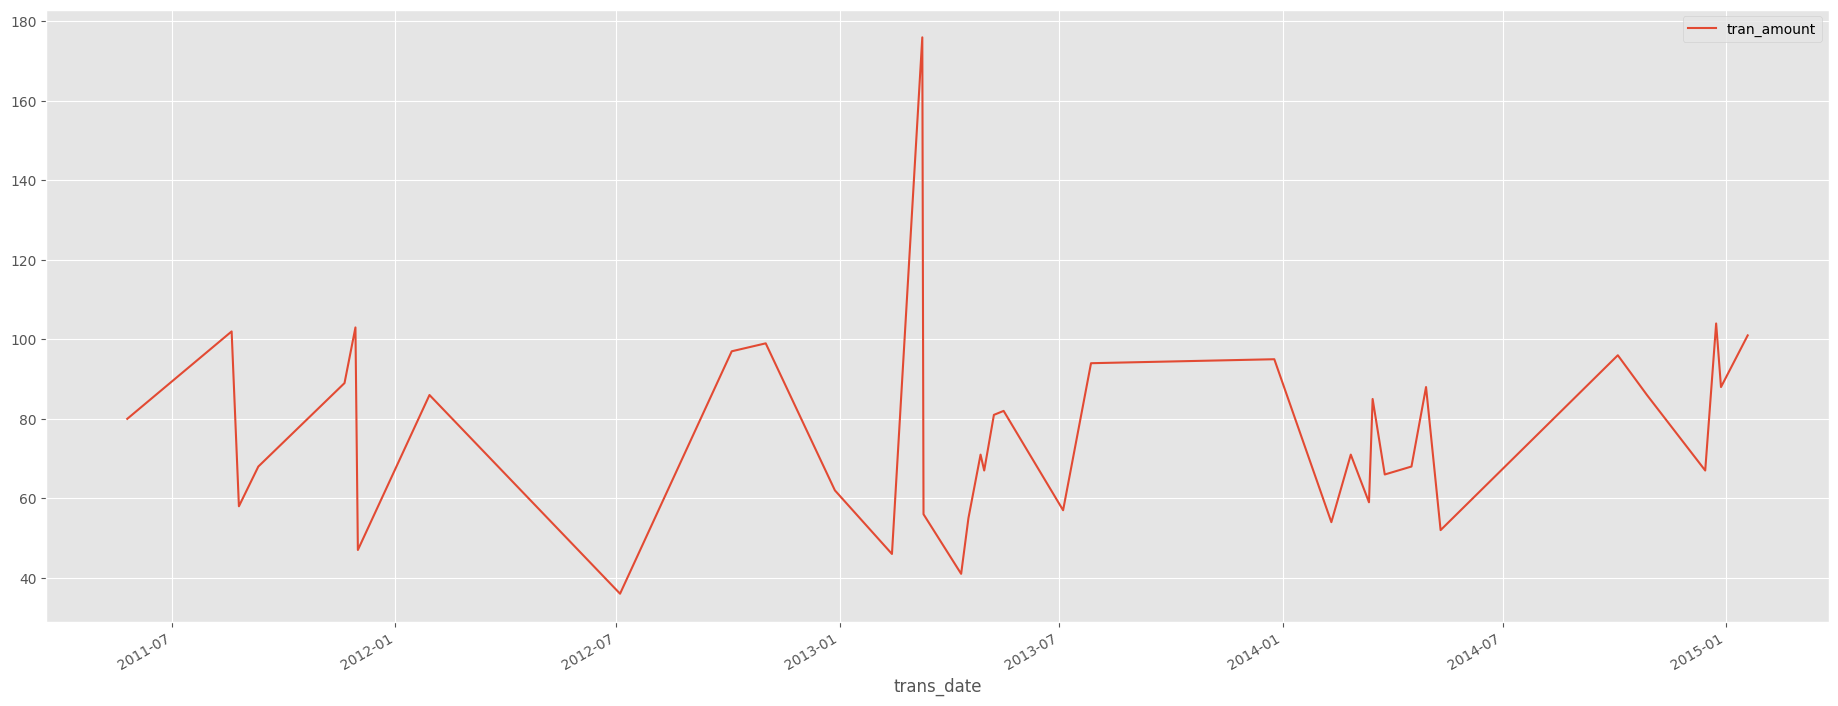

In [148]:
sample.plot()

## Пример работы с непериодичными данными

В наших данных можно заметить, что они **непериодичны**. Мы имеем данные о транзакциях за некоторые дни в разные месяцы. Чтобы упростить анализ, можно перейти к более "высокому" периоду (например, от дней к месяцам).

Для такого перехода необходимо:
1. **Выбрать период агрегирования** — например, месяц.
2. **Определить метод агрегирования данных**:
   - **Суммирование**: сложение всех значений за период.
   - **Усреднение**: вычисление среднего значения за период.
   - Другие методы в зависимости от поставленной задачи.

### Важные замечания:
- Подобный переход может быть успешным только в том случае, если данные достаточно плотные и промежутки между наблюдениями невелики. 
  - Например, если данные почасовые, но каждый день есть хотя бы одно наблюдение, переход к дневному или недельному уровню возможен.
  - Если промежутки между наблюдениями слишком велики, переход на более высокий период приведёт к появлению "дыр" в данных — периодов, для которых нет точек наблюдения.

---

## Пример перехода к недельным данным

Попробуем преобразовать наши данные из спорадических в недельные. При этом возникнет проблема: многие недели останутся пустыми, поскольку для них отсутствуют наблюдения. Такой переход может быть неэффективен, если данные слишком редки.

Пример преобразования и проблема "пустых" недель:

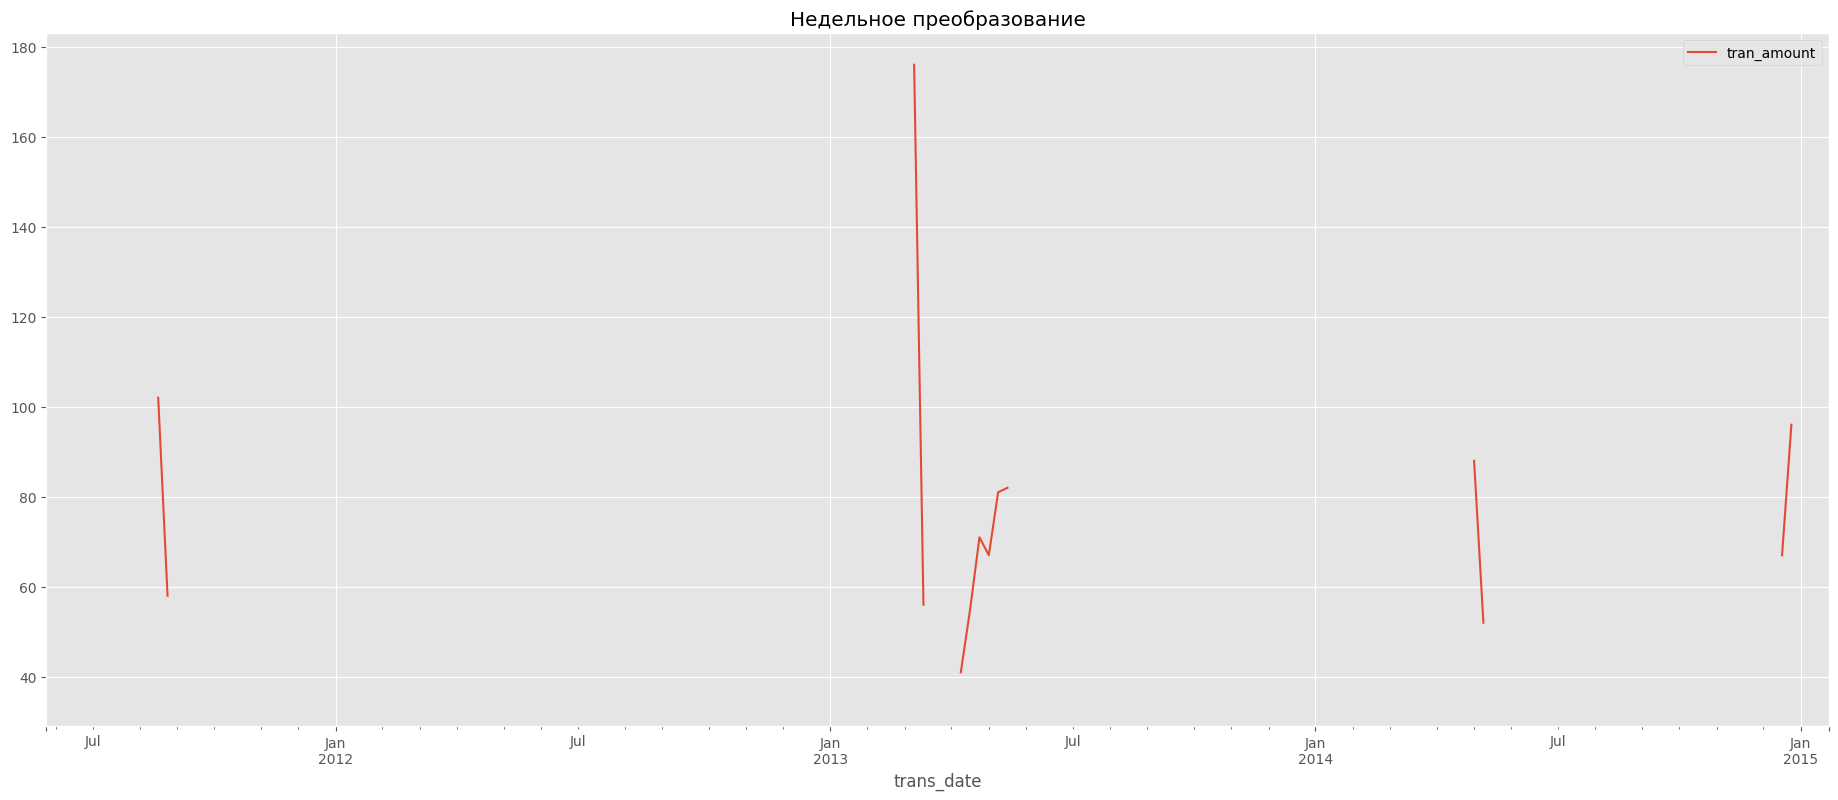

In [155]:
sample.resample("W").mean().plot()
plt.title('Недельное преобразование');


/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_24544/1346161841.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sample.resample("M").mean().plot()


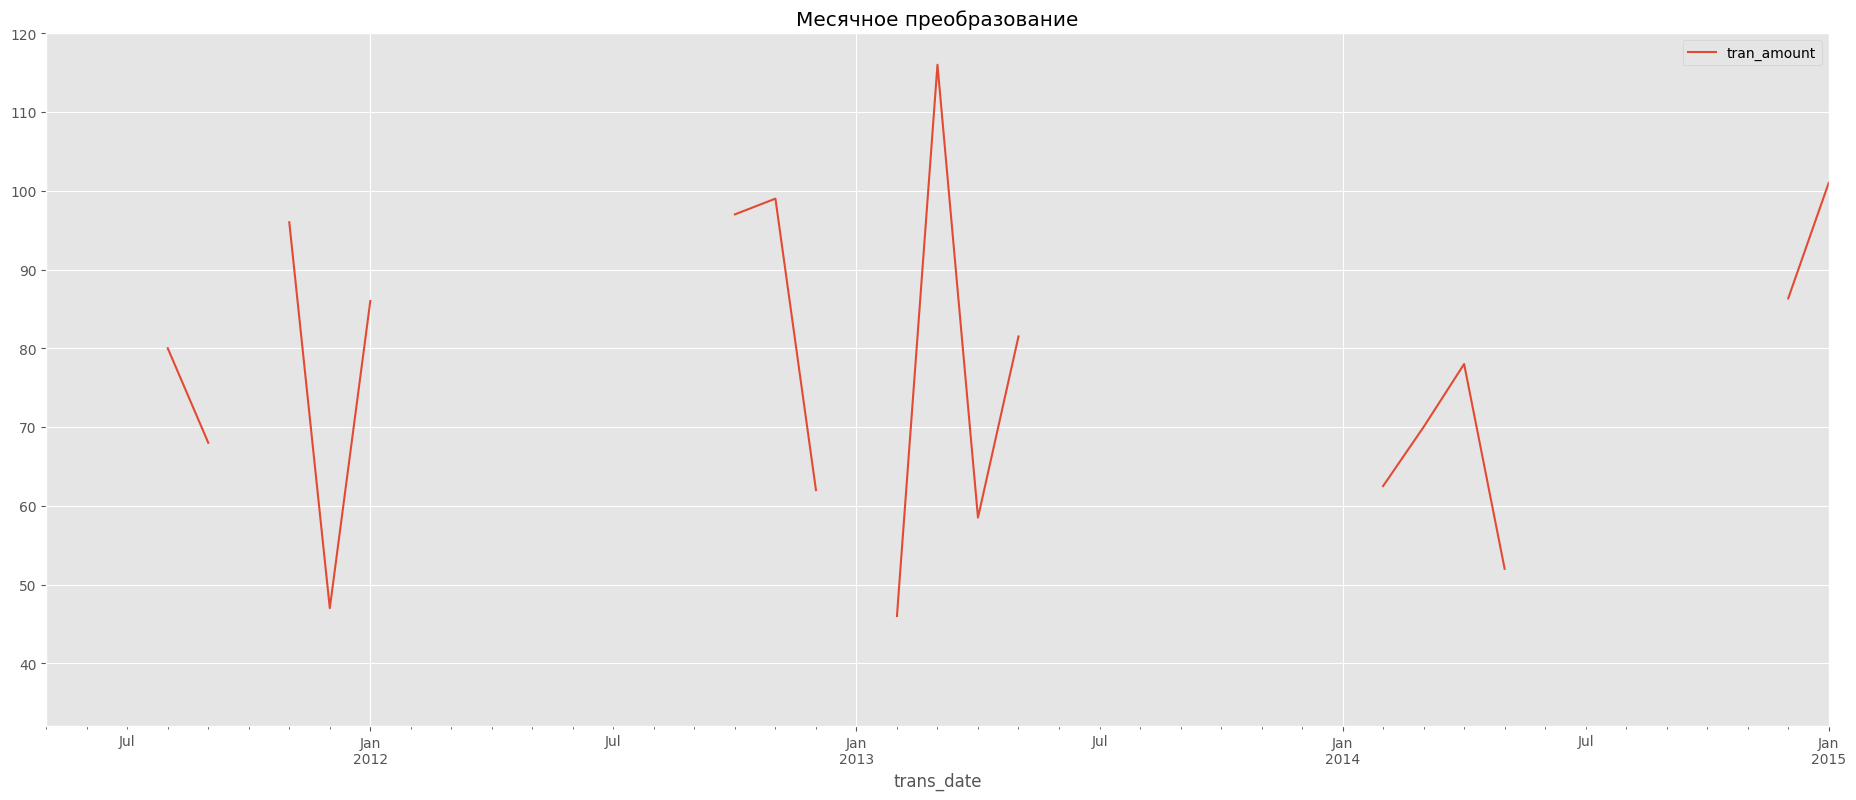

In [156]:
sample.resample("M").mean().plot()
plt.title('Месячное преобразование');

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_24544/678832478.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  sample.resample("Q").mean().plot()


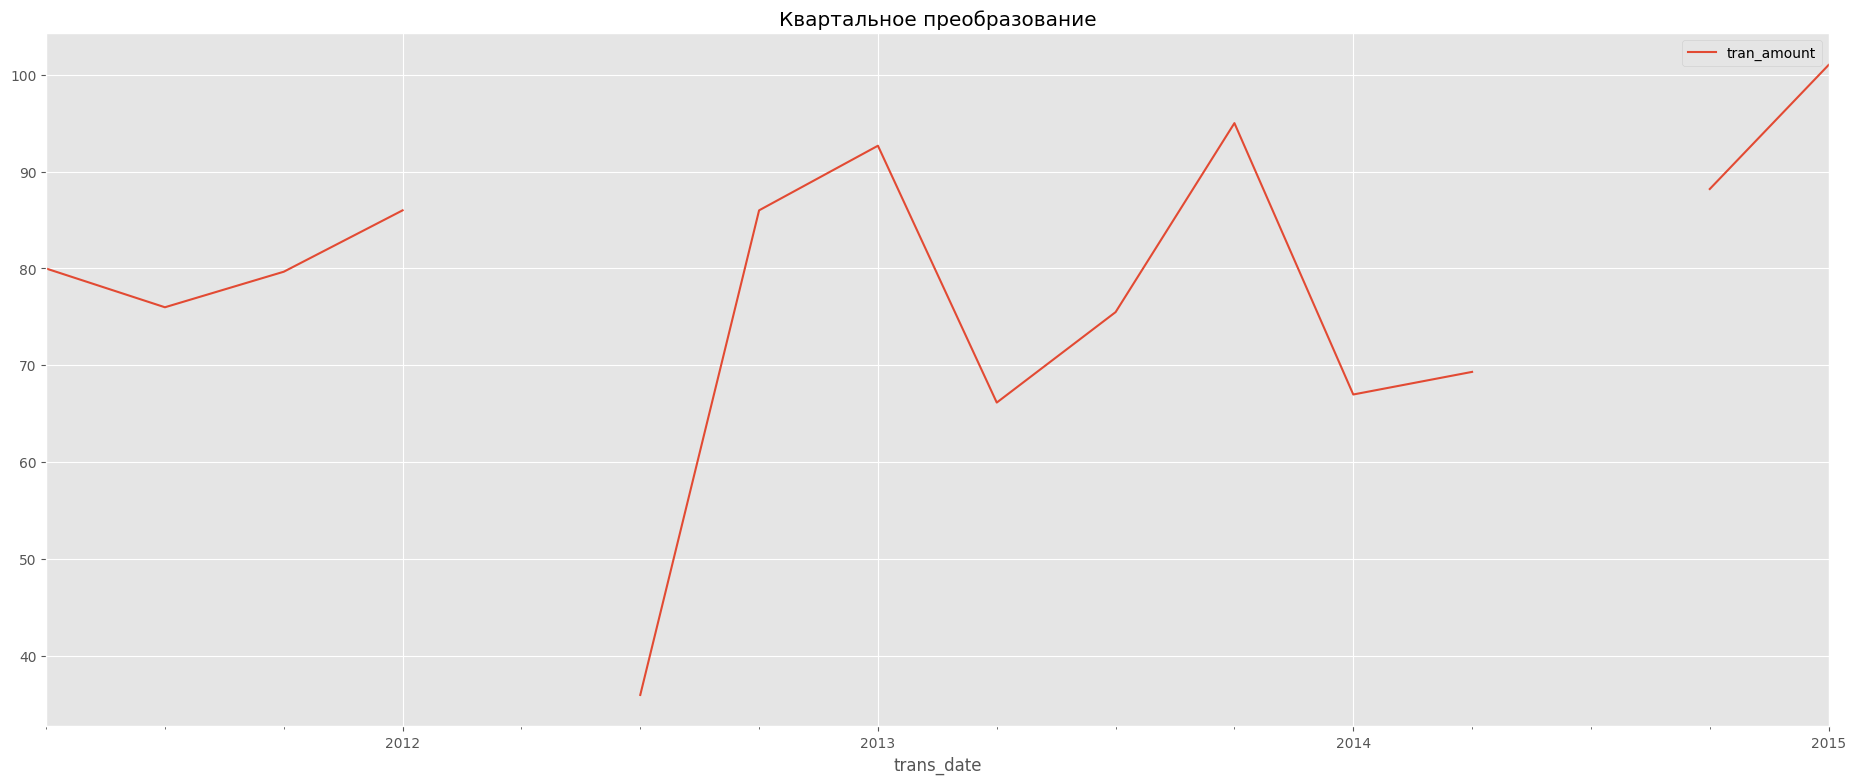

In [157]:
sample.resample("Q").mean().plot()
plt.title('Квартальное преобразование');

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_24544/1458961844.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sample.resample("Y").mean().plot()


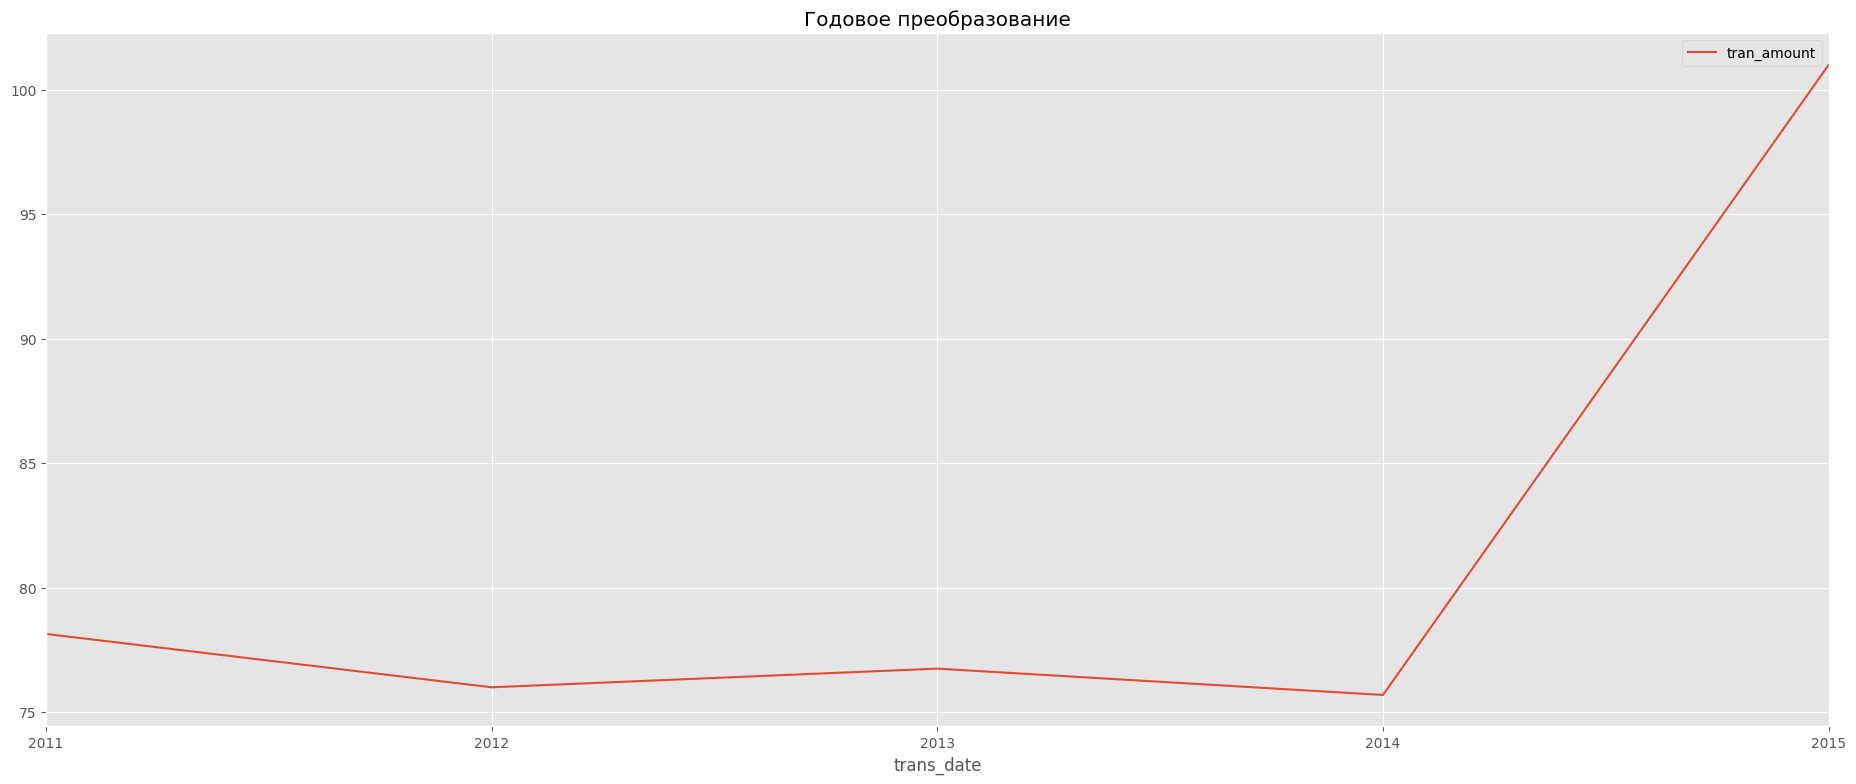

In [158]:
sample.resample("Y").mean().plot()
plt.title('Годовое преобразование');

In [160]:
sample.resample("Y").mean()

/var/folders/cp/4bl3kvm10tl3r81sxqkgg1q00000gn/T/ipykernel_24544/3362478765.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  sample.resample("Y").mean()


,tran_amount
trans_date,
2011-12-31,78.142857
2012-12-31,76.000000
2013-12-31,76.750000
2014-12-31,75.692308
2015-12-31,101.000000


Как мы видим, агрегация позволила сделать из непериодичных данных периодичные, но при этом данных осталось очень мало. Этот пример скорее иллюстративный. В такой ситуации скорее нужно искать альтернативную модель для работы со спорадическими данныи, чем агрегировать.

На самом деле, можно сделать такое преобразование и с периодичными данным -- просто чтобы понизить гранулярность ваших данных. Это может быть удобно и/или требоваться по задаче. Например, если наблюдения за объёмами продаж некоторого товара есть на каждый час, то просуммировать на дни вполне логично. Особенно если есть наблюдения за много дней. 

## Выравнивание

Данные с идеальной периодичностью это обычно уже подготовленные датасеты. Например, с соревнований. Так или иначе, они обычно уже агрегированны. В реальности это скорее мечта чем данность. 

Я по долгу службы много работал с публикациями ценовых котировок удобрений и всякой химии. Данные обычно предполагались недельными и публиковались в определённые дни. Например, многие источники публиковали данные по четвергам. Однако из-за праздников или просто проблем издателя данные иногда публиковались в среду, пятницу или вообще как попало. Моей задачей было агрегировать данные из разных источников и свести их к единой сетке. Для этого пришлось написать ряд эвристик.

In [ ]:
dates =  pd.date_range(
        '01.01.2024', periods=100, freq="W"
    ).values

import numpy as np

updated_dates = []

for i, date in enumerate(dates):

    if i > 50:
        date = date +  pd.DateOffset(days=1)

    if i < 40 or i > 60:
        updated_dates.append(date)



dates = pd.DatetimeIndex(updated_dates)


In [163]:
dates

DatetimeIndex(['2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18', '2024-02-25',
               '2024-03-03', '2024-03-10', '2024-03-17', '2024-03-24',
               '2024-03-31', '2024-04-07', '2024-04-14', '2024-04-21',
               '2024-04-28', '2024-05-05', '2024-05-12', '2024-05-19',
               '2024-05-26', '2024-06-02', '2024-06-09', '2024-06-16',
               '2024-06-23', '2024-06-30', '2024-07-07', '2024-07-14',
               '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
               '2024-08-18', '2024-08-25', '2024-09-01', '2024-09-08',
               '2024-09-15', '2024-09-22', '2024-09-29', '2024-10-06',
               '2025-03-10', '2025-03-17', '2025-03-24', '2025-03-31',
               '2025-04-07', '2025-04-14', '2025-04-21', '2025-04-28',
               '2025-05-05', '2025-05-12', '2025-05-19', '2025-05-26',
               '2025-06-02', '2025-06-09', '2025-06-16', '2025-06-23',
      

In [164]:
from sem_01_custom_dateutil import Frequency

In [165]:
Frequency.W_MON.ensure(dates)

DateError: Обнаружены даты, которые не соответствуют частоте W_MON:
2024-01-07, 
2024-01-14, 
2024-01-21, 
2024-01-28, 
2024-02-04, 
2024-02-11, 
2024-02-18, 
2024-02-25, 
2024-03-03, 
2024-03-10, 
2024-03-17, 
2024-03-24, 
2024-03-31, 
2024-04-07, 
2024-04-14, 
2024-04-21, 
2024-04-28, 
2024-05-05, 
2024-05-12, 
2024-05-19, 
2024-05-26, 
2024-06-02, 
2024-06-09, 
2024-06-16, 
2024-06-23, 
2024-06-30, 
2024-07-07, 
2024-07-14, 
2024-07-21, 
2024-07-28, 
2024-08-04, 
2024-08-11, 
2024-08-18, 
2024-08-25, 
2024-09-01, 
2024-09-08, 
2024-09-15, 
2024-09-22, 
2024-09-29, 
2024-10-06

In [166]:
Frequency.W_MON.align_dates(dates)

DatetimeIndex(['2024-01-08', '2024-01-15', '2024-01-22', '2024-01-29',
               '2024-02-05', '2024-02-12', '2024-02-19', '2024-02-26',
               '2024-03-04', '2024-03-11', '2024-03-18', '2024-03-25',
               '2024-04-01', '2024-04-08', '2024-04-15', '2024-04-22',
               '2024-04-29', '2024-05-06', '2024-05-13', '2024-05-20',
               '2024-05-27', '2024-06-03', '2024-06-10', '2024-06-17',
               '2024-06-24', '2024-07-01', '2024-07-08', '2024-07-15',
               '2024-07-22', '2024-07-29', '2024-08-05', '2024-08-12',
               '2024-08-19', '2024-08-26', '2024-09-02', '2024-09-09',
               '2024-09-16', '2024-09-23', '2024-09-30', '2024-10-07',
               '2025-03-10', '2025-03-17', '2025-03-24', '2025-03-31',
               '2025-04-07', '2025-04-14', '2025-04-21', '2025-04-28',
               '2025-05-05', '2025-05-12', '2025-05-19', '2025-05-26',
               '2025-06-02', '2025-06-09', '2025-06-16', '2025-06-23',
      

In [56]:
Frequency.W_MON.get_ensure_percentage(dates, check_deltas=False)

0.48717948717948717

In [57]:
Frequency.W_MON.get_denominator_percentage(dates, 7)

0.9871794871794872

TODO: Рассказать про пересмотр данных и несколько точек на один период. Например, пересмотр котировок.

## Характеристики рядов

In [171]:
import statsmodels.api as sm
data = sm.datasets.macrodata.load_pandas().data

In [172]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [173]:
#Преобразуем данные из колонок в индекс. В данном случае проще всего было сгенерировать самим последовательность кварталов, чтобы не мучаться с конвертацией столбцов
data.index = pd.date_range(start = '01.01.1959', periods = len(data), freq=pd.offsets.QuarterEnd())
data = data.drop(columns = ['year', 'quarter'])
display(data)

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


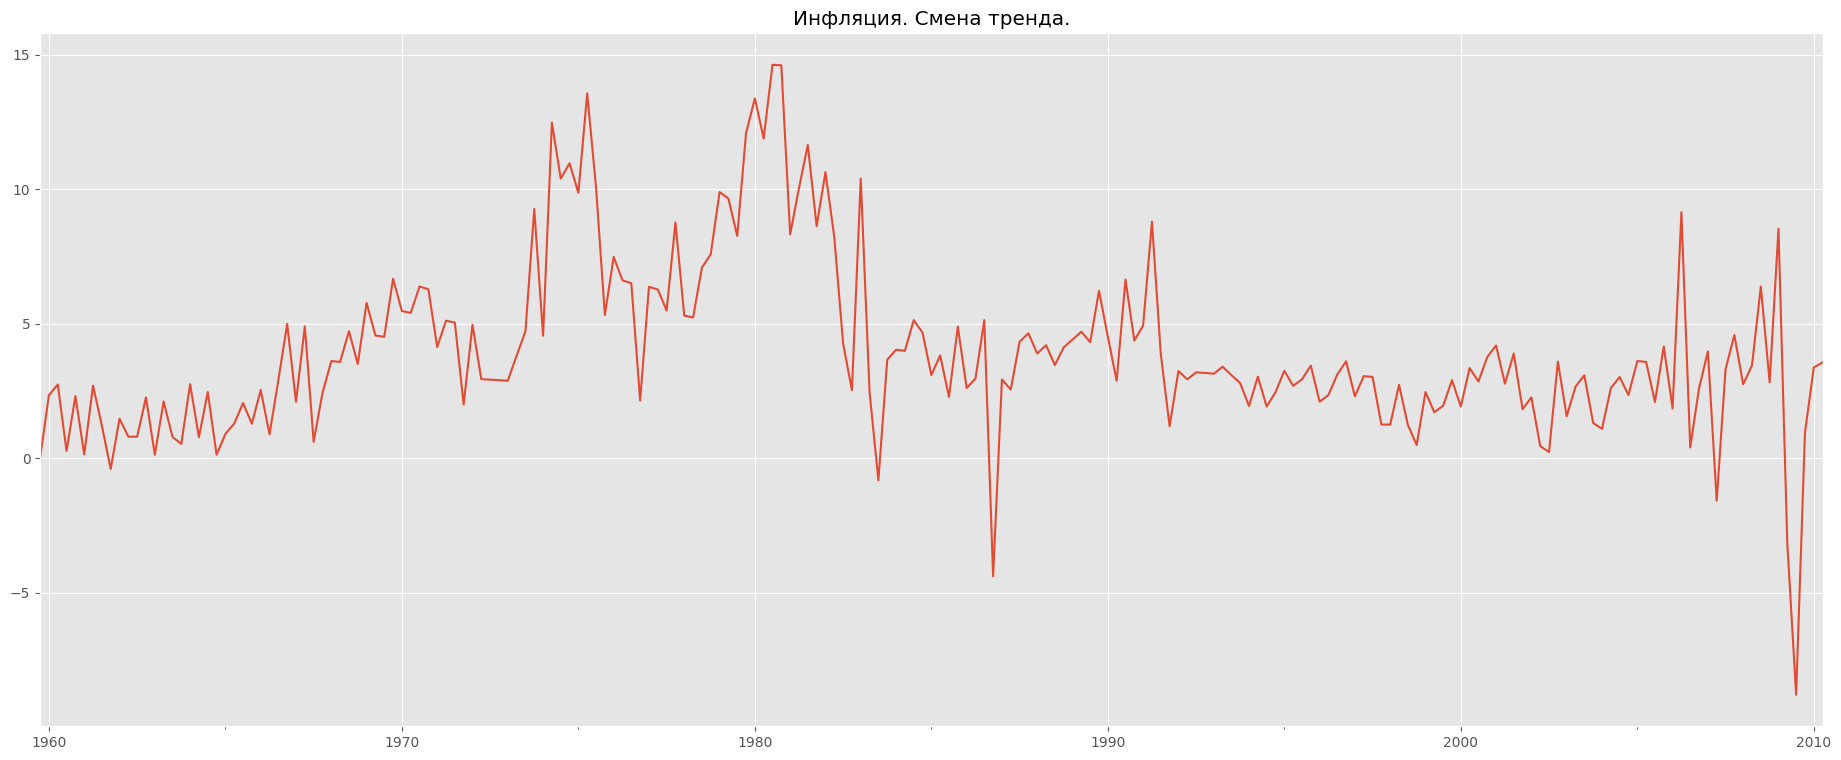

In [174]:
data.infl.plot()
plt.title('Инфляция. Смена тренда.');

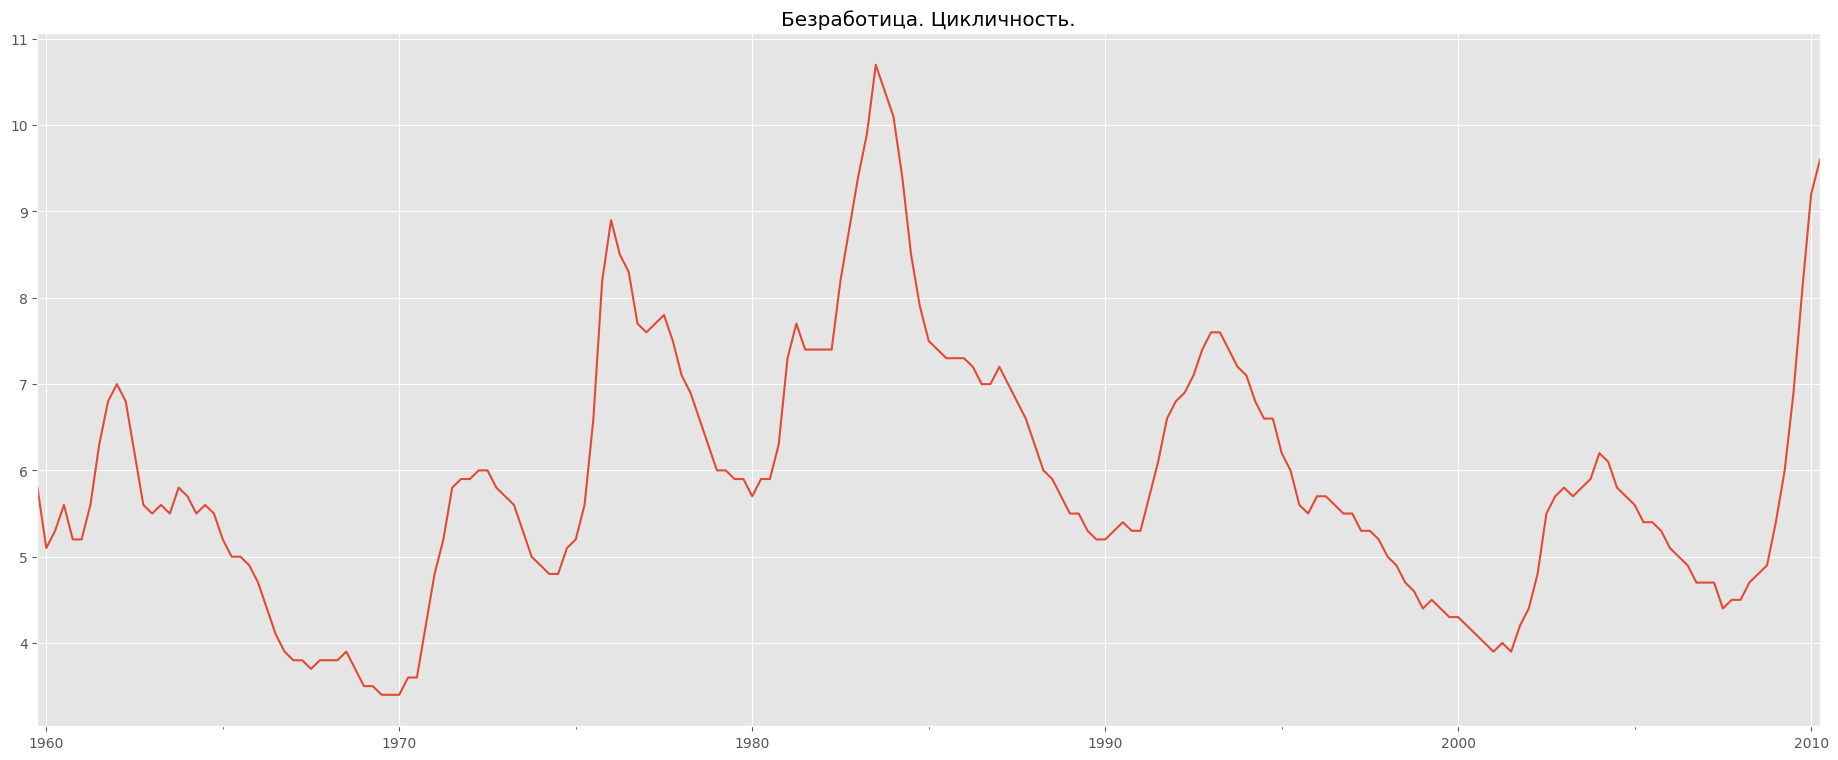

In [175]:
data.unemp.plot()
plt.title('Безработица. Цикличность.');

In [186]:
data.loc[:, 'pop'] = data.loc[:, 'pop'].diff()
data_normalized = (data - data.mean(axis=0).values.reshape(1, -1))/data.std(axis=0).values.reshape(1,-1)

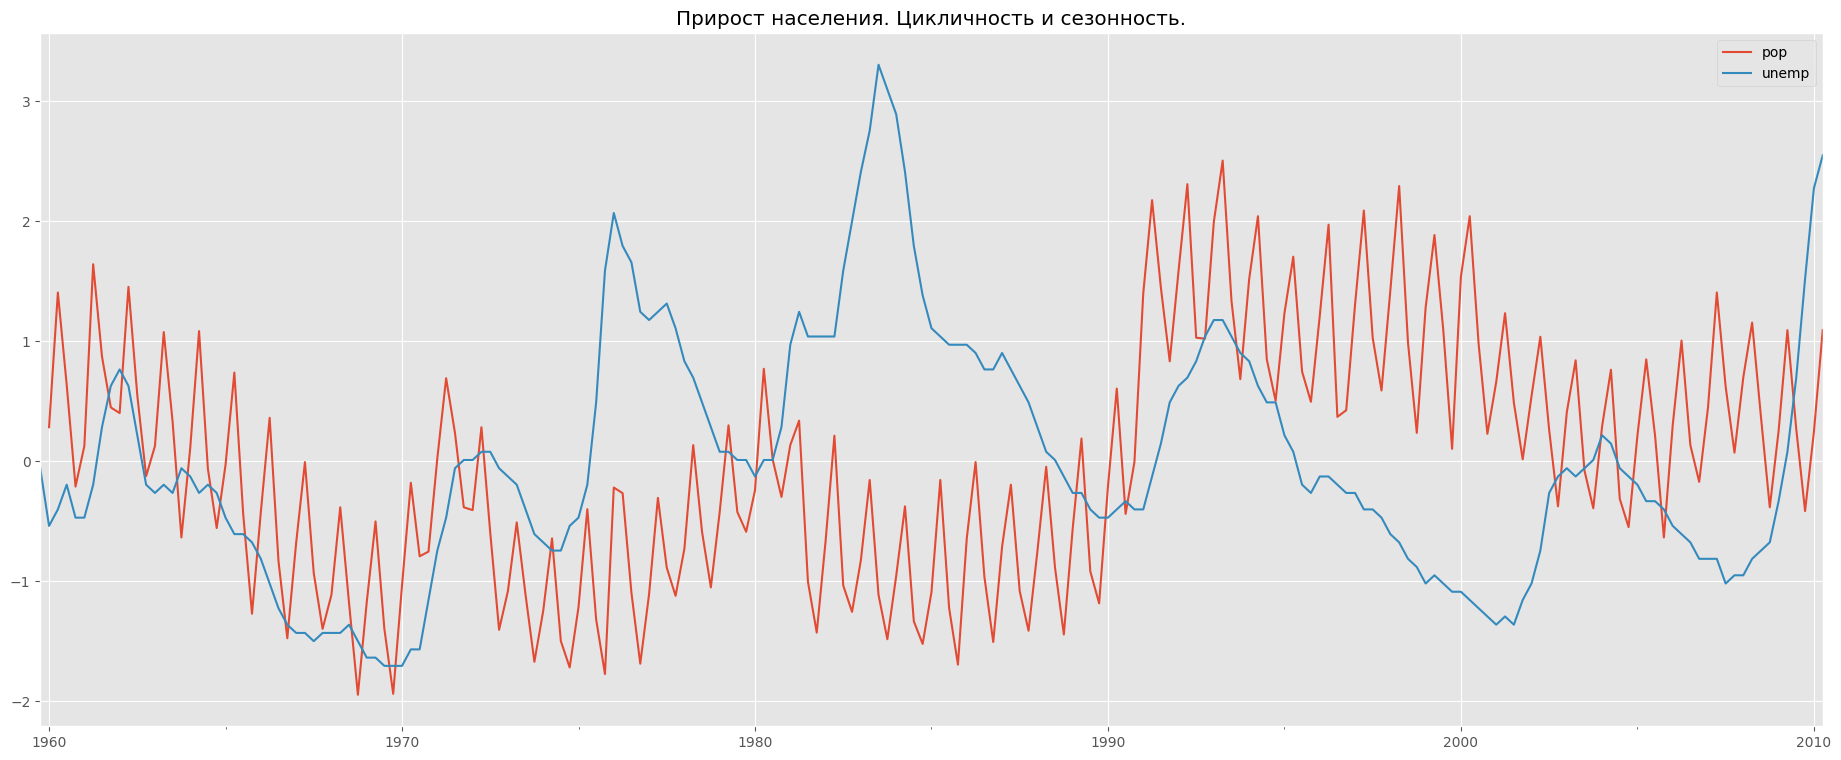

In [187]:
data_normalized.loc[:,['pop', 'unemp']].plot()

plt.title('Прирост населения. Цикличность и сезонность.');

In [32]:
data.loc[:,'pop'].diff()

1959-03-31      NaN
1959-06-30    0.684
1959-09-30    0.827
1959-12-31    0.729
1960-03-31    0.621
              ...  
2008-09-30    0.787
2008-12-31    0.682
2009-03-31    0.595
2009-06-30    0.679
2009-09-30    0.787
Freq: Q-DEC, Name: pop, Length: 203, dtype: float64

## Стационарность

Одной из важнейших характеристик случайного процесса является стационарность. Различают два вида стационарности -- в широком и в узком смысле.  Случайный процесс $X_{t}$ называется стационарным (statiоnary, стационарным в узком смысле), если все его конечномерные распределения инвариантны относительно сдвигов, т.е. для любых наборов моментов времени $t_{1}, \ldots, t_{n}$, любых вещественных $x_{1}, \ldots, x_{n}$ и любого $h>0$,


$$\mathbb{P}\left\{X_{t_{1}} \leq x_{1}, \ldots, X_{t_{n}} \leq x_{n}\right\}=\mathbb{P}\left\{X_{t_{1}+h} \leq x_{1}, \ldots, X_{t_{n}+h} \leq x_{n}\right\}$$

Грубо говоря, совместные распределения на любых двух равных по длине временных отрезках равны друг другу. Но очевидно, что в реальной жизни такие процессы найти весьма сложно, хотя и очень хотелось бы. В определении слабой стационарности  (wide sense stationary, weakly stationary, covariance stationary, second-order stationary) предлагается ослабить предыдущее условие. Пусть постоянными во времени будут не все характеристики распределения, а только некоторые моменты. Так, если у случайного процесса математическое ожидание постоянно во времени, и кроме того, для любых $h>0, s, t \in \mathbb{R}$ выполнено

$$Cov(X_{t+h}, X_{s+h})=Cov(X_t, X_s)$$


то процесс является слабостационарным. То есть у всех точек равное математическое ожидание, равная дисперсия, а ковариации равны для точек, разнесённых на равные отрезки времени. Нетрудно заметить, что в случае гауссовских процессов из слабой стационарности может следовать сильная, но во всех остальных случаях -- только в обратную сторону.

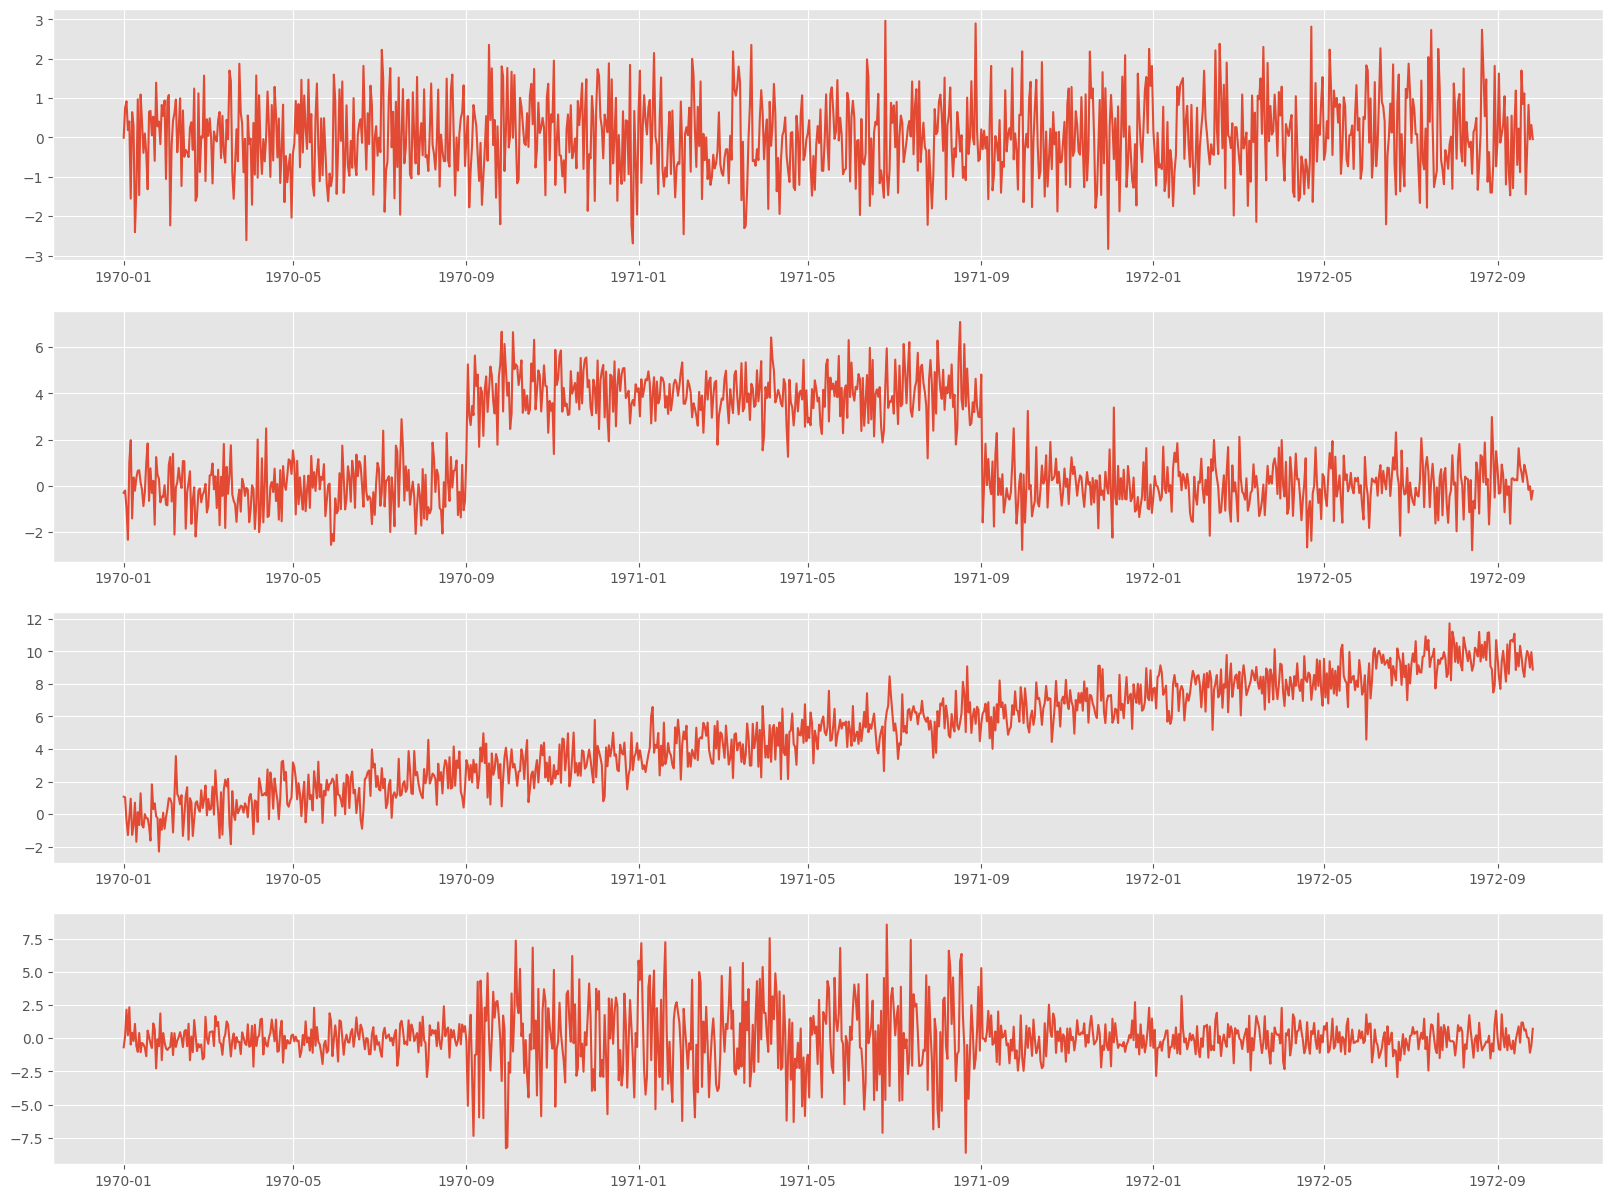

In [ ]:
import numpy as np
n_sim = 1000
fig, ax = plt.subplots(nrows=4, figsize=(20,15))
index = pd.date_range(start='01.01.1970', periods=n_sim, freq='D')

ax[0].plot(pd.Series(np.random.normal(size=n_sim), index=index))
ax[1].plot(pd.Series(
    np.random.normal(size=n_sim) +
    (index > '1970-09') * 4 -
    (index > '1971-09') * 4,
    index=index))
ax[2].plot(pd.Series(np.random.normal(size=n_sim) + np.arange(n_sim)/100, index=index))

ax[3].plot(pd.Series(
    np.random.normal(scale=1 +
    (index > '1970-09') * 2 -
    (index > '1971-09') * 2, size=n_sim) ,
    index=index))

## Корреляционные характеристики

У случайных процессов существует специальная характеристика, показывающая силу линейных взаимосвязей внутри них. Соответственно, по временным рядам (траекториям этих случайных процессов) мы можем построить оценки этих характеристик. Давайте поговорим о том, что они из себя представляют и как их вычислять.

Автокорреляцией k-го порядка будем называть величину $corr(y_t, y_{t-k})$. Самый простой способ оценить эту величину -- подсчитать выборочный коэффициент корреляции  $\hat{corr}(y_t, y_{t-k})$. Также можно построить парную регрессию и зять корень из коэффициента детерминации, но это будет ровно то же самое. Обычно вычисляют значения для значений $k \in \{1,\cdots,K\}$ и строят график. О том, как использовать информацию о линейных связях для построения моделей, мы поговорим позже. А пока взглянем на график ACF (Autocorrelation function)

In [193]:
from statsmodels.graphics.tsaplots import plot_acf

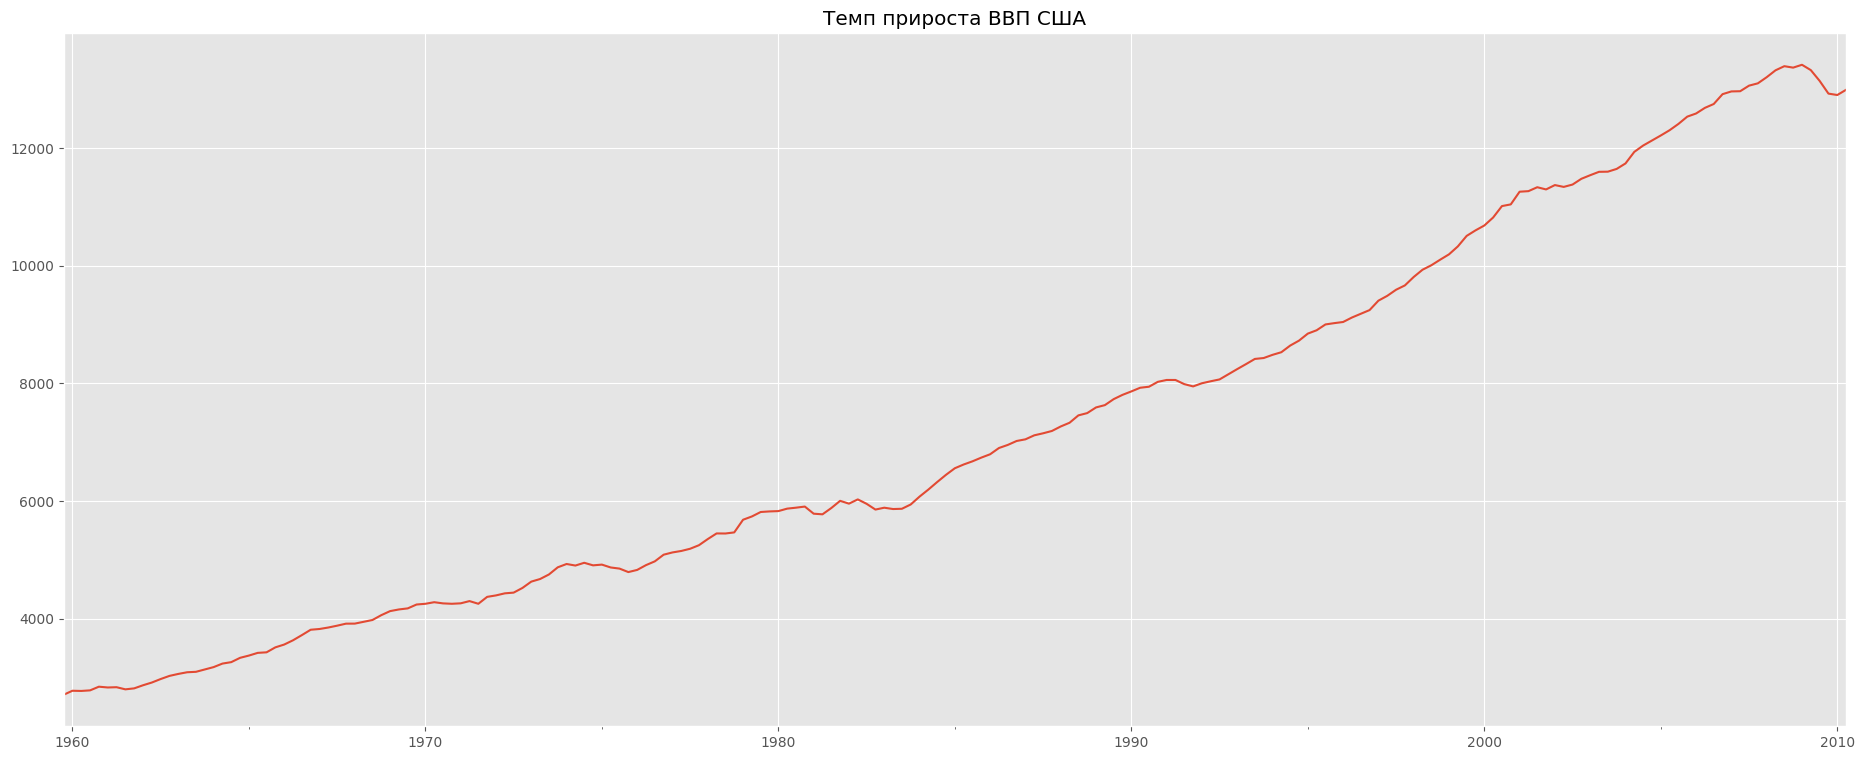

In [189]:
# Темп прироста ВВП
g_rate = data.realgdp
g_rate.plot()
plt.title("Темп прироста ВВП США");

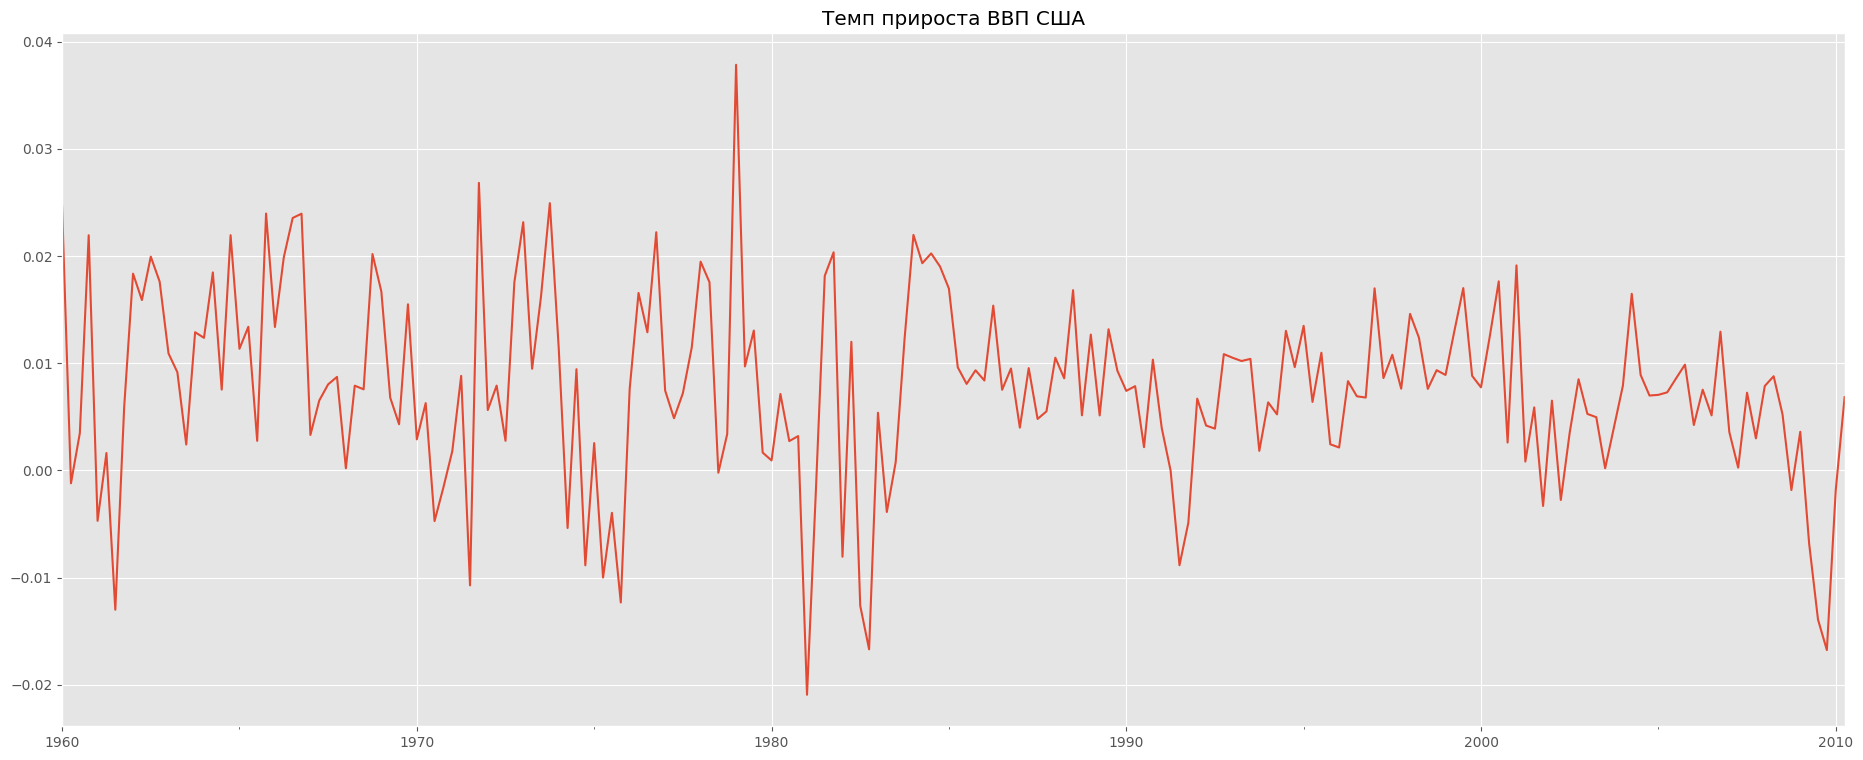

In [190]:
# Темп прироста ВВП
g_rate = (data.realgdp.diff() / data.realgdp).dropna()
g_rate.plot()
plt.title("Темп прироста ВВП США");

In [191]:
pd.DataFrame([
    data.realgdp, data.realgdp.shift(3)
]).T

,realgdp,realgdp
1959-03-31,2710.349,NaN
1959-06-30,2778.801,NaN
1959-09-30,2775.488,NaN
1959-12-31,2785.204,2710.349
1960-03-31,2847.699,2778.801
...,...,...
2008-09-30,13324.600,13391.249
2008-12-31,13141.920,13366.865
2009-03-31,12925.410,13415.266
2009-06-30,12901.504,13324.600


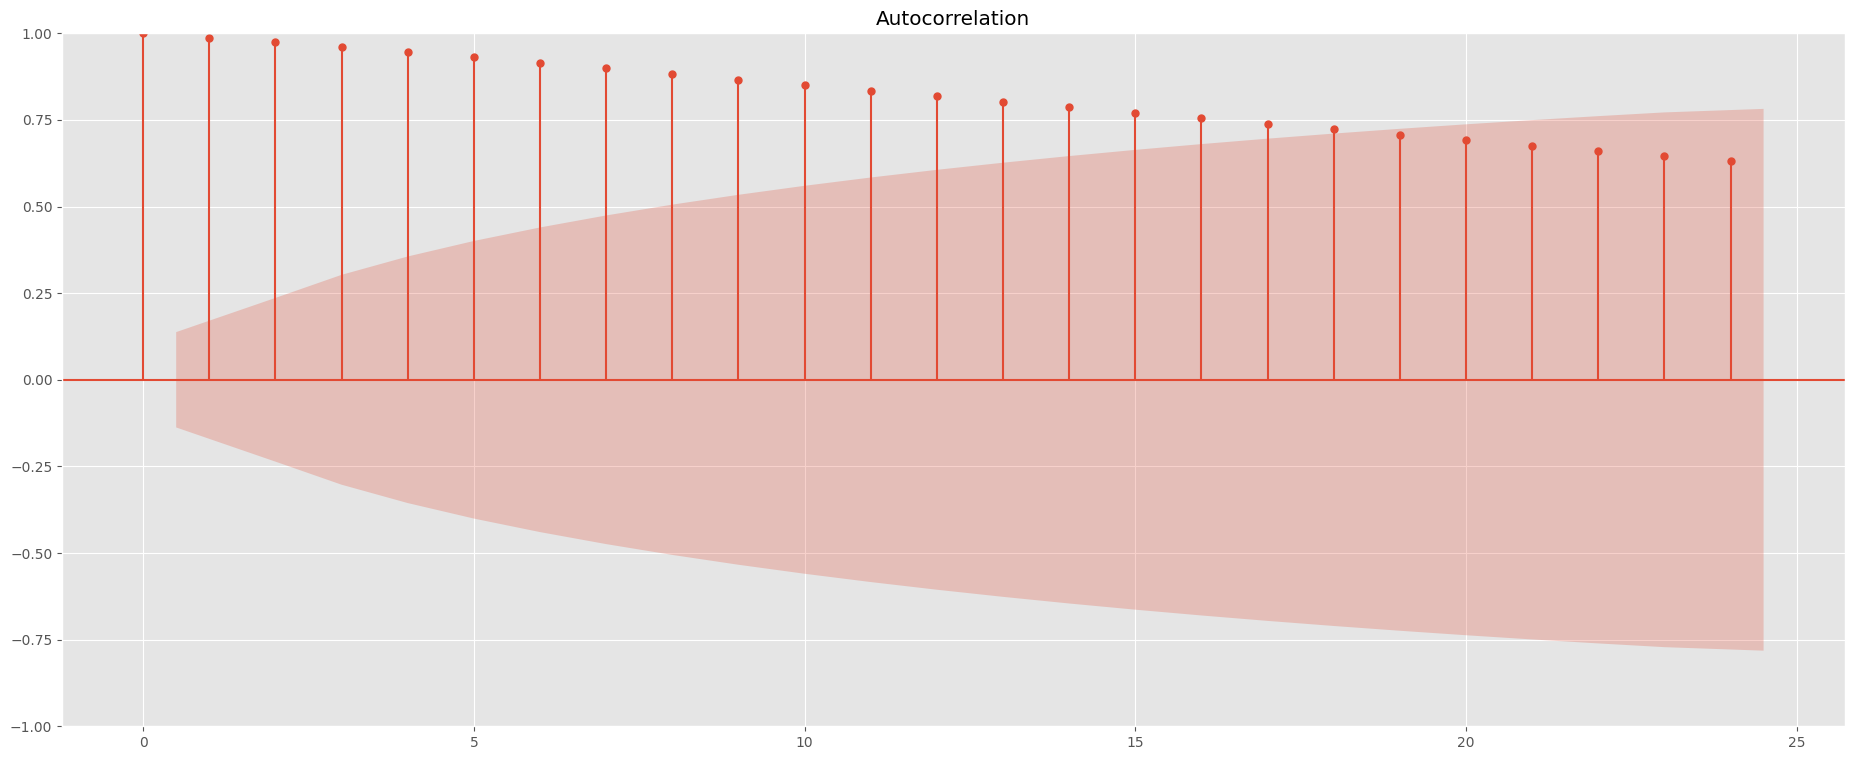

In [194]:
plot_acf(data.realgdp);

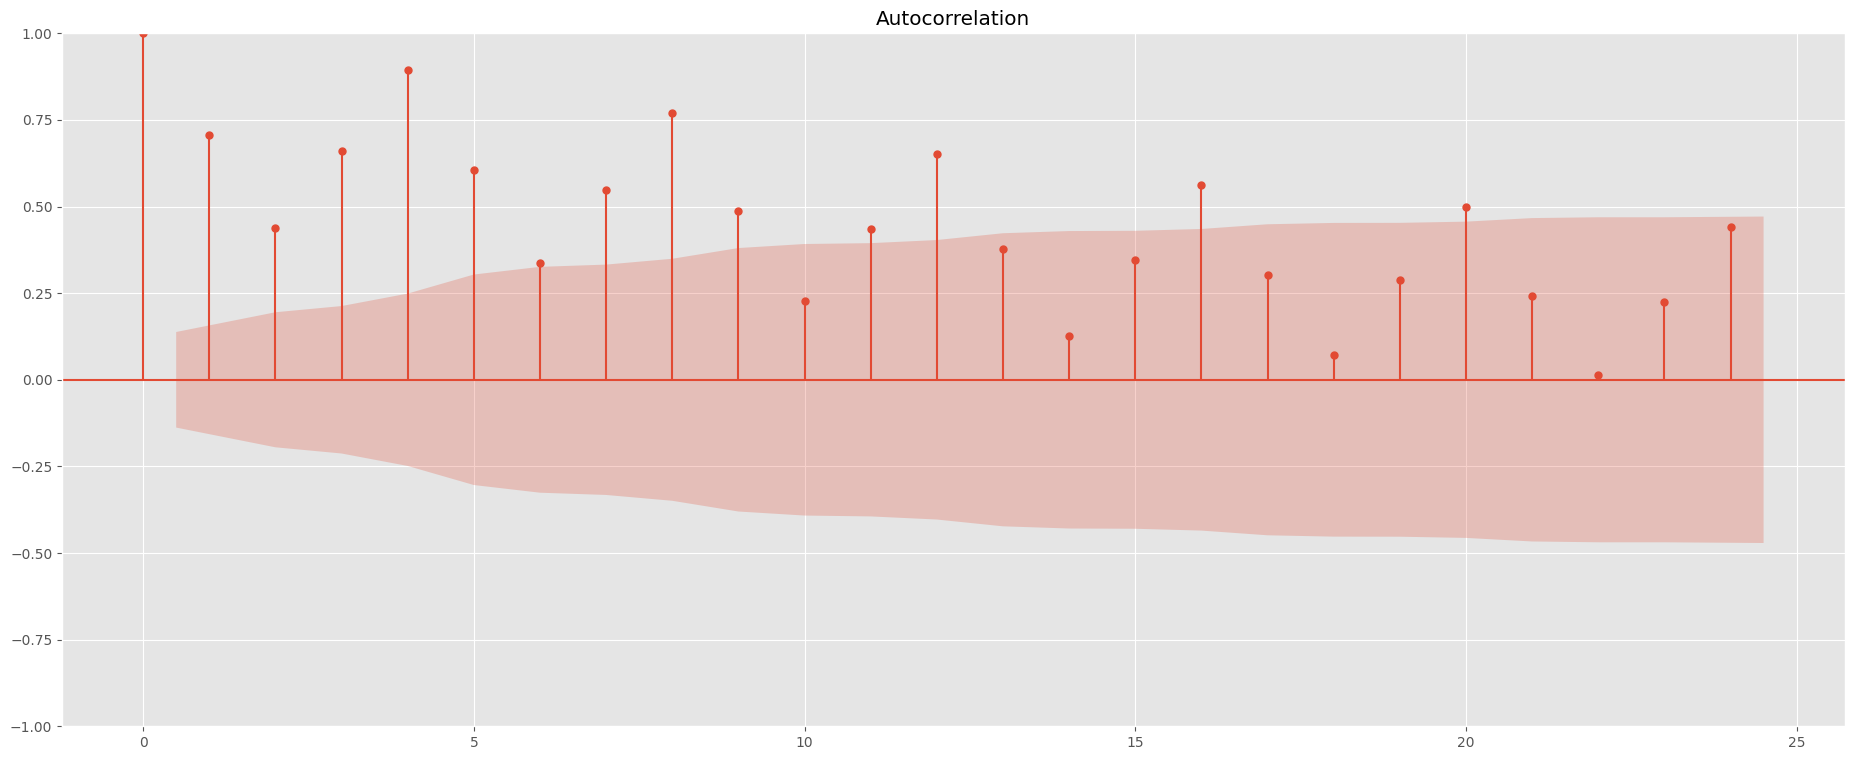

In [198]:
plot_acf(data.loc[:, 'pop'].dropna());

Вообще говоря, если мы взглянем на формулу автокорреляции, она может показаться неполной. Да, мы смотрим на связь переменной и её лагированного значения, но при этом не учитываем всё, что было между ними. Хотелось бы в дополнение к обычной корреляции знать и условную: $corr(y_t, y_{t-k}| y_{t-1}, y_{t-2}, \cdots, y_{t-k+1})$. Для её нахождения существуют разные методы. Из основных -- численное решение системы уравнений Yule-Walker  или построение регрессий (рассмотрим подробнее в контексте ARIMA). Нарисуема пару графиков PACF (Partial Autocorrelation Function)



In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\zehov\Desktop\current_projects\envs\ts\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


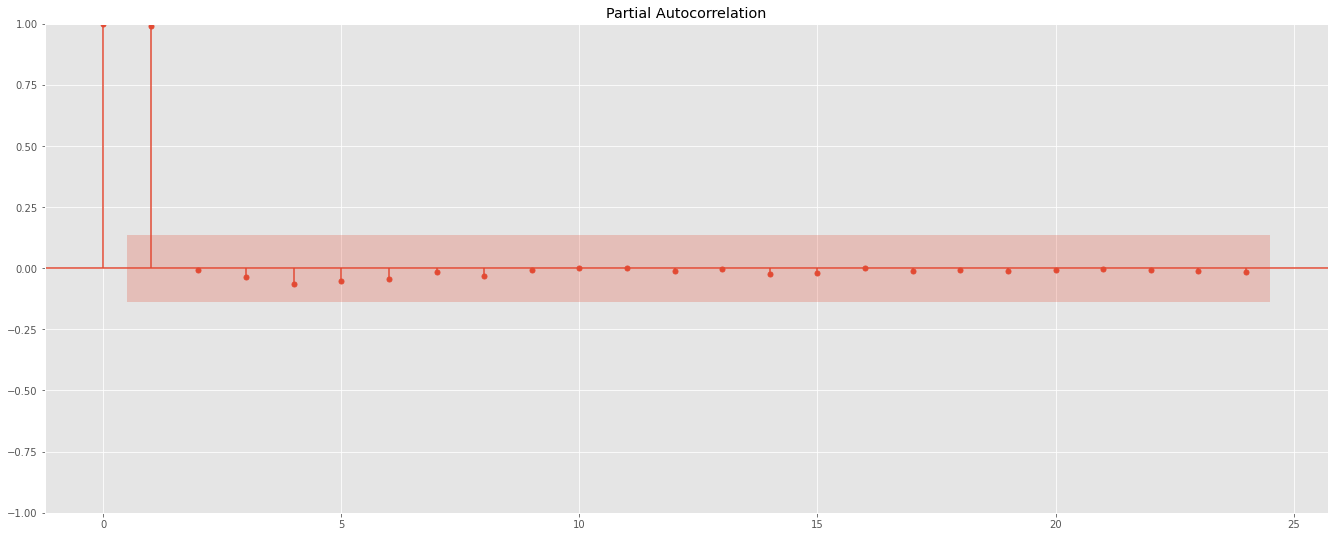

In [41]:
plot_pacf(data.realgdp);

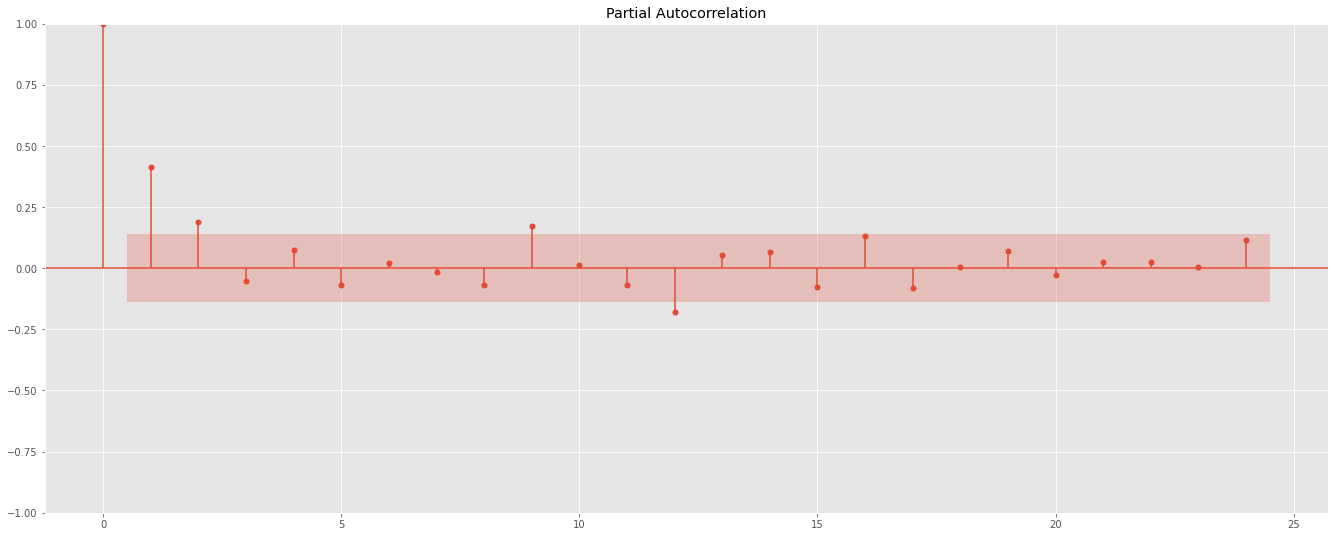

In [42]:
plot_pacf(data.realgdp.diff().dropna());